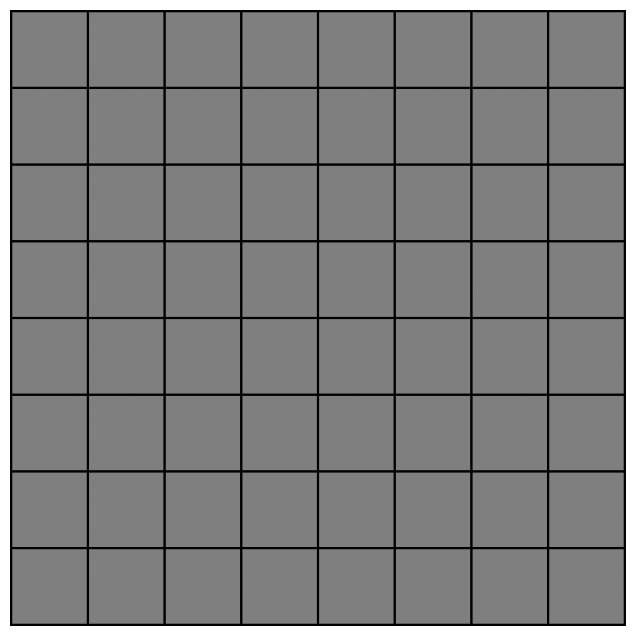

In [5]:
import torch 
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
from dcgans import Generator

# Settings
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
latent_dim = 100
image_channels = 1  # Change to 3 if you're working with color images (e.g., CIFAR-10)
# For DCGANs built for MNIST, the output image size is typically 28x28.
img_shape = (image_channels, 28, 28)
# generator_path = "generator.pth"  # Path to your saved generator weights

# Initialize and load the generator
generator = Generator(image_channels=image_channels, latent_dim=latent_dim, generator_feature_map_size=64).to(device)
# generator.load_state_dict(torch.load(generator_path, map_location=device))
generator.eval()

# Generate a batch of images from random noise
batch_size = 64
noise = torch.randn(batch_size, latent_dim, 1, 1, device=device)
with torch.no_grad():
    gen_imgs = generator(noise)

# The generator uses Tanh activation, so outputs are in [-1, 1]. Normalize them to [0, 1] for display.
gen_imgs = (gen_imgs + 1) / 2

# Create a grid of images
grid = make_grid(gen_imgs, nrow=8)

# The grid is in shape (C, H, W). If it's a color image (C==3), permute it to (H, W, C)
if grid.shape[0] == 3:
    grid = grid.permute(1, 2, 0)

plt.figure(figsize=(8, 8))
plt.imshow(grid.cpu().numpy())
plt.axis("off")
plt.show()